## Importing libraries

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import multilabel_confusion_matrix
import graphviz

## Read data

In [78]:
iris=pd.read_csv("Iris.csv")

In [79]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [80]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [81]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [82]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [83]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


## Visualization

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'SepalLengthCm'}>],
       [<AxesSubplot:title={'center':'SepalWidthCm'}>,
        <AxesSubplot:title={'center':'PetalLengthCm'}>],
       [<AxesSubplot:title={'center':'PetalWidthCm'}>, <AxesSubplot:>]],
      dtype=object)

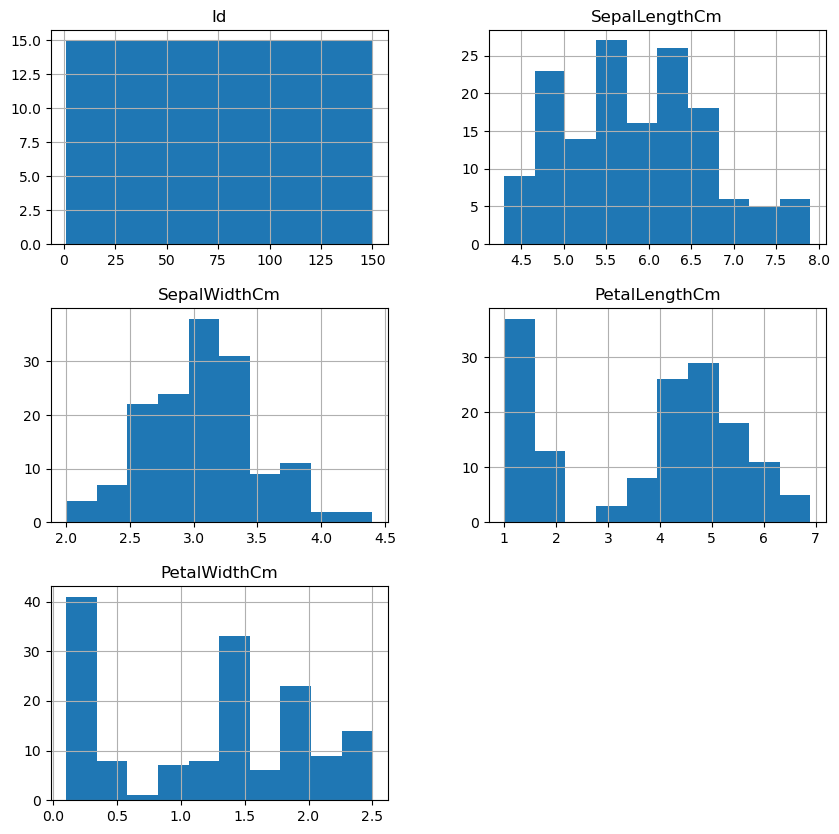

In [84]:
iris.hist(figsize=(10, 10))

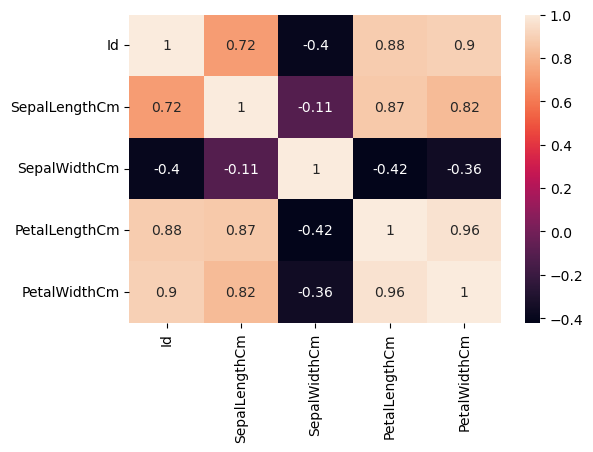

In [85]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(iris.corr(),annot=True)
plt.show()

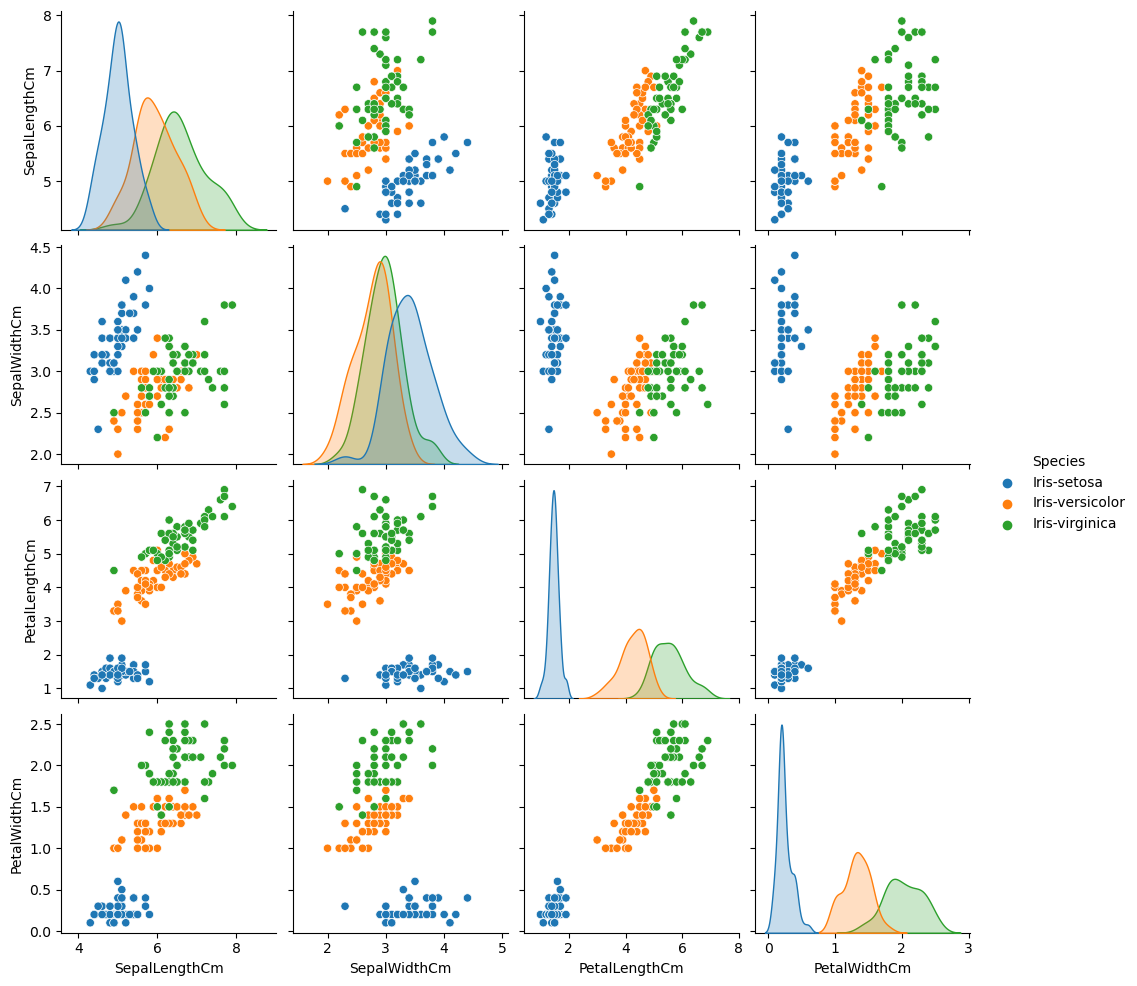

In [86]:
sns.pairplot(iris.drop(['Id'],axis=1),hue="Species")
plt.show()

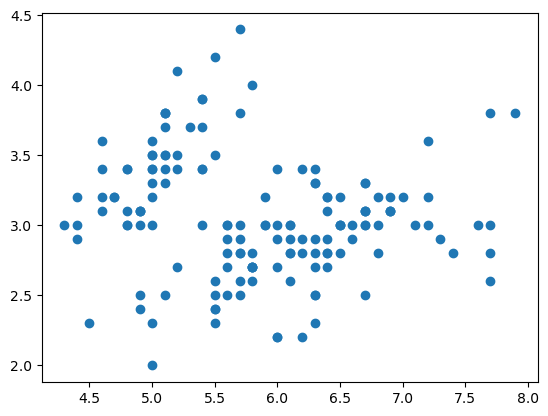

In [87]:
plt.scatter(iris['SepalLengthCm'],iris['SepalWidthCm'])
plt.show()

In [88]:
iris1 = iris.values
X = iris1[:,0:5]
Y = iris1[:,5]

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
Xv_train, Xv_test, yv_train, yv_test = train_test_split(X_train, y_train, test_size=0.2)

## Training data with decision tree

In [90]:
classifier=DecisionTreeClassifier()
classifier.fit(Xv_train,yv_train)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'X[0] <= 50.5\ngini = 0.664\nsamples = 96\nvalue = [34, 34, 28]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'X[0] <= 100.5\ngini = 0.495\nsamples = 62\nvalue = [0, 34, 28]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]')]

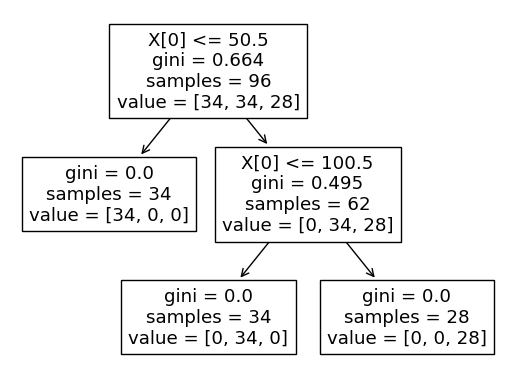

In [91]:
tree.plot_tree(classifier)

In [92]:
predictions =classifier.predict(Xv_test)

In [93]:
print(predictions[:5])

['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor']


In [94]:
print(multilabel_confusion_matrix(yv_test, predictions))

[[[19  0]
  [ 0  5]]

 [[14  0]
  [ 0 10]]

 [[15  0]
  [ 0  9]]]


In [95]:
cross_val_score(classifier,X_test,y_test,scoring='accuracy').mean()

0.9

In [96]:
predictions =classifier.predict(X_test)
accuracy_score(y_test, predictions)

1.0

In [97]:
print(multilabel_confusion_matrix(y_test, predictions))

[[[19  0]
  [ 0 11]]

 [[24  0]
  [ 0  6]]

 [[17  0]
  [ 0 13]]]


In [100]:
Test_point=[[5.4,3.0,4.5,1.5,1.5],[20,19,6.5,7.8,6.1],[1.1,2.5,8.7,-9.3,6.1],[5.1,3.3,1.7,0.5,1.6],[130,7.3,2.6,5.1,0.1]]

In [101]:
classifier.predict(Test_point)

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica'], dtype=object)